Download the data

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-07-29 04:58:14--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-07-29 04:58:15--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc251f043f84e4ac705158048d2d.dl.dropboxusercontent.com/cd/0/inline/CAxsbvJxW3-WcaYV1uU76KJrjrTzQrvkO_bLEbG9BS39ydprvqegW6EWdgsl1l-7aZDNEhXiDRcz0dXs_YEaTeLHOs1eTmoE-tjSyuJ4gG6jJv4JnWgSX3djpbyHQyPyQZO86NmQ2OzM5MNhPHv9hKBK/file# [following]
--2023-07-29 04:58:15--  https://uc251f043f84e4ac705158048d2d.dl.dropboxusercontent.com/cd/0/inline/CAxsbvJxW3-WcaYV1uU76KJrjrTzQrvkO_bLEbG9BS39ydprvqegW6EWdgsl1l-7aZDNEhXiDRcz0dXs_YEaTeLHOs

In [ ]:
!unzip '/content/training_set.zip'
!unzip '/content/test_set.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/dogs/dog.1930.jpg  
  inflating: training_set/training_set/dogs/dog.1931.jpg  
  inflating: training_set/training_set/dogs/dog.1932.jpg  
  inflating: training_set/training_set/dogs/dog.1933.jpg  
  inflating: training_set/training_set/dogs/dog.1934.jpg  
  inflating: training_set/training_set/dogs/dog.1935.jpg  
  inflating: training_set/training_set/dogs/dog.1936.jpg  
  inflating: training_set/training_set/dogs/dog.1937.jpg  
  inflating: training_set/training_set/dogs/dog.1938.jpg  
  inflating: training_set/training_set/dogs/dog.1939.jpg  
  inflating: training_set/training_set/dogs/dog.194.jpg  
  inflating: training_set/training_set/dogs/dog.1940.jpg  
  inflating: training_set/training_set/dogs/dog.1941.jpg  
  inflating: training_set/training_set/dogs/dog.1942.jpg  
  inflating: training_set/training_set/dogs/dog.1943.jpg  
  inflating: training_set/training_set/dogs/dog.1944.jpg  
  infl

Procedure for CNN

- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size
- Checkpointing

Populating the interactive namespace from numpy and matplotlib


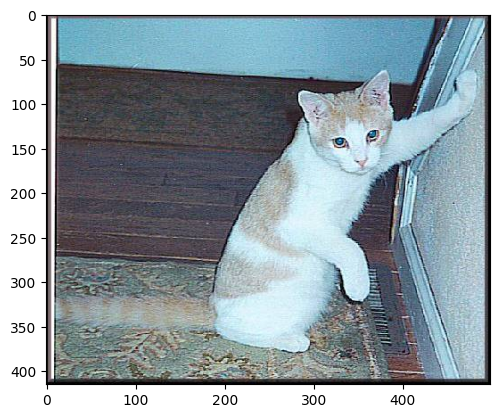

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(415, 498, 3)

Populating the interactive namespace from numpy and matplotlib


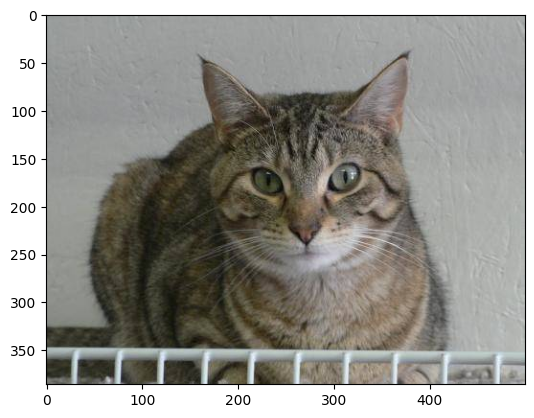

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2=mpimg.imread('/content/training_set/training_set/cats/cat.103.jpg')
img2plot = plt.imshow(img2)
plt.show()

In [ ]:
img2.shape

(386, 500, 3)

Populating the interactive namespace from numpy and matplotlib


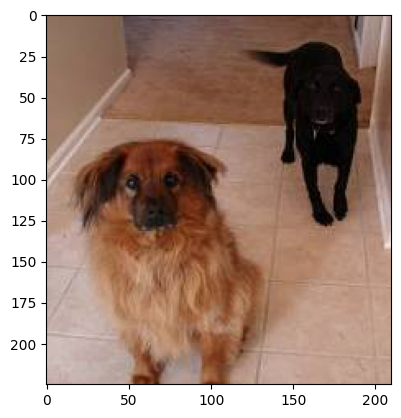

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img3=mpimg.imread('/content/training_set/training_set/dogs/dog.1168.jpg')
img3plot = plt.imshow(img3)
plt.show()

In [ ]:
img3.shape

(225, 210, 3)

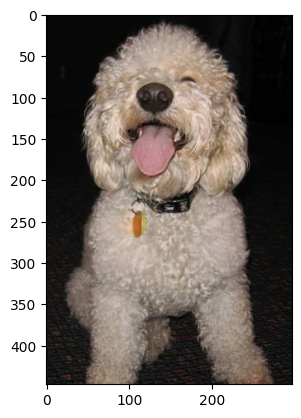

In [ ]:
img4=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
img4plot = plt.imshow(img4)
plt.show()


# LOAD ALL RELAVENT LIBRARIES

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
import matplotlib.image as mpimg

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

# Load the image and add variation


In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


In [ ]:
test_datagen=ImageDataGenerator ( rescale=1. /255)

In [ ]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [ ]:
test_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 2023 images belonging to 2 classes.


# Create the model

## Model1

In [ ]:
model = Sequential()
#Block1
model.add(Conv2D(64, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block2
model.add(Conv2D(128, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block3
model.add(Conv2D(512, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Classification
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                    

conv2d doesnot gives coloured img

## Model compilation

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=test_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-21-4f9efd293776>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 30s 173ms/step - loss: 1.0685 - accuracy: 0.5220 - val_loss: 0.6782 - val_accuracy: 0.5535
Epoch 2/20
100/100 [==============================] - 18s 180ms/step - loss: 0.6903 - accuracy: 0.5320 - val_loss: 0.6794 - val_accuracy: 0.5625
Epoch 3/20
100/100 [==============================] - 32s 324ms/step - loss: 0.6817 - accuracy: 0.5780 - val_loss: 0.6623 - val_accuracy: 0.6010
Epoch 4/20
100/100 [==============================] - 22s 216ms/step - loss: 0.6770 - accuracy: 0.5778 - val_loss: 0.6499 - val_accuracy: 0.6165
Epoch 5/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6674 - accuracy: 0.5945 - val_loss: 0.6574 - val_accuracy: 0.6335
Epoch 6/20
100/100 [==============================] - 18s 181ms/step - loss: 0.6500 - accuracy: 0.6335 - val_loss: 0.6106 - val_accuracy: 0.6855
Epoch 7/20
100/100 [==============================] - 18s 176ms/step - loss: 0.6510 - accuracy: 0.6160 - val_loss: 0.6478 - val_ac

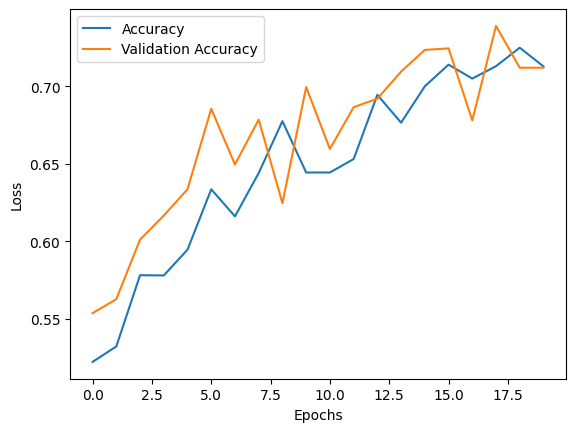

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot()
plt.show()

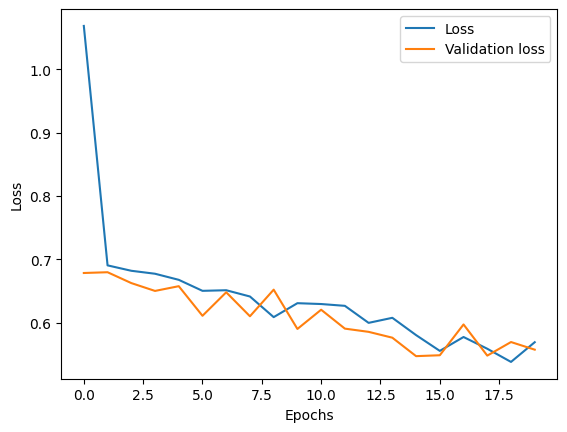

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot()
plt.show()

## Predict the image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
rslt = model.predict(img_pred)


1/1 [==============================] - 0s 289ms/step


In [ ]:
rslt

array([[1.]], dtype=float32)

In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Dog


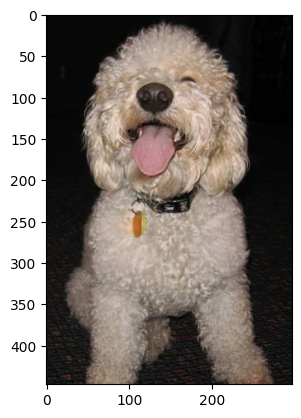

In [ ]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Dog


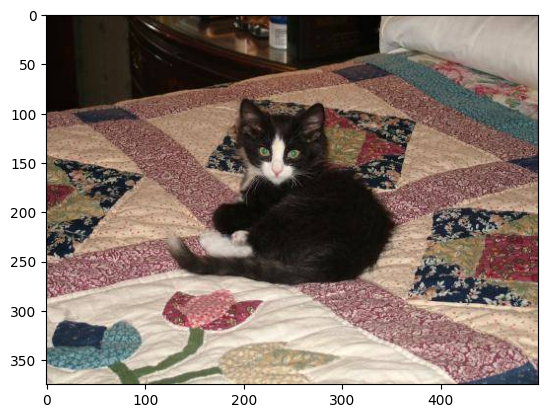

In [ ]:
img=mpimg.imread('/content/training_set/training_set/cats/cat.1004.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img_pred = image.load_img('/content/training_set/training_set/cats/cat.1004.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
rslt = model.predict(img_pred)


1/1 [==============================] - 0s 31ms/step


In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Cat


## Model2

Incresing the layers


In [ ]:
model1 = Sequential()
#Block1
model1.add(Conv2D(64, (3,3),input_shape = input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#Block2
model1.add(Conv2D(128, (3,3),input_shape = input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#Block3
model1.add(Conv2D(64, (3,3),input_shape = input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#Block4
model1.add(Conv2D(512, (3,3),input_shape = input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#Classification
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Dense(128))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_4 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 activation_5 (Activation)   (None, 72, 72, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                  

## Model compilation

In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training2 = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=test_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-37-6408aeeb108a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training2 = model1.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 20s 167ms/step - loss: 0.7350 - accuracy: 0.5179 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/20
100/100 [==============================] - 19s 186ms/step - loss: 0.6940 - accuracy: 0.4905 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 3/20
100/100 [==============================] - 19s 186ms/step - loss: 0.6934 - accuracy: 0.4945 - val_loss: 0.6943 - val_accuracy: 0.4975
Epoch 4/20
100/100 [==============================] - 17s 168ms/step - loss: 0.6939 - accuracy: 0.5065 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 5/20
100/100 [==============================] - 17s 166ms/step - loss: 0.6936 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 6/20
100/100 [==============================] - 17s 169ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6967 - val_accuracy: 0.4965
Epoch 7/20
100/100 [==============================] - 18s 185ms/step - loss: 0.6942 - accuracy: 0.5015 - val_loss: 0.6935 - val_ac

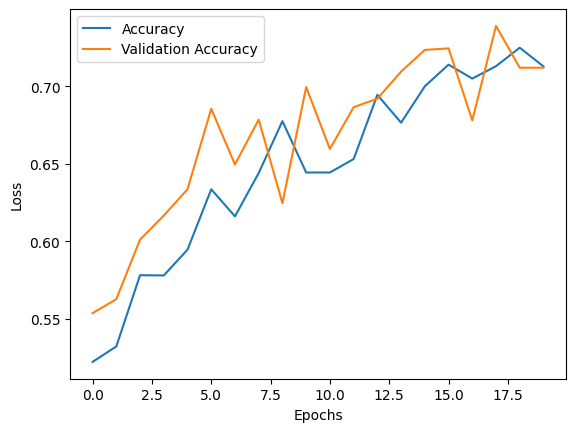

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot()
plt.show()

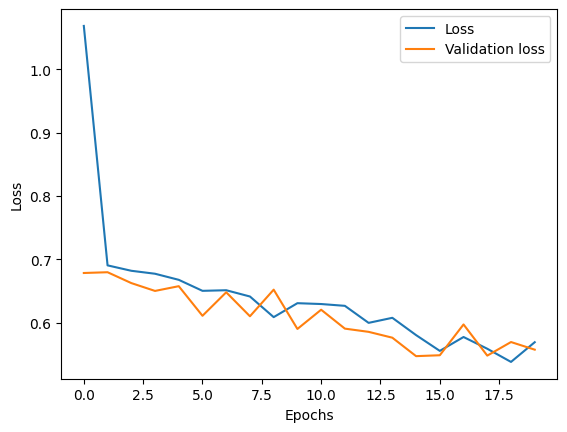

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot()
plt.show()

# Transfer Learning

## Model - VGG16

In [ ]:
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model #Functional model
from keras import applications

In [ ]:
pre_trained_model=VGG16(input_shape=input_shape,include_top=False , weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


* weights and bias are store in h5 file

* An H5 is one of the Hierarchical Data Formats (HDF) used to store large amount of data. It is used to store large amount of data in the form of multidimensional arrays.

In [ ]:
for layer in pre_trained_model.layers[:15] :
  #upto 15 training
  layer.trainable=False
for layer in pre_trained_model.layers[15:] :
  #upto 15 training
  layer.trainable=True
last_layer=pre_trained_model.get_layer('block5_pool')
last_output=last_layer.output


* To summarize, this code takes a pre-trained model, freezes the first 15 layers to preserve their pre-trained weights, allows the remaining layers (after the 15th layer) to be trainable, and then retrieves the output tensor from the 'block5_pool' layer for further use in the model construction.

* get layer= get the output from the final layer

Custom layers for classification ->



In [ ]:
from keras.layers import GlobalMaxPool2D


In [ ]:
from keras.layers import GlobalMaxPool2D
#flatten the output layer to one dimension
x=GlobalMaxPool2D()(last_output)
#add a fully connected layer with 512 hidden units and RELU activation
x=Dense(512,activation='relu')(x)
#add dropout rate of 0.5
x=Dropout(0.5)(x)
#add final sigmoid layer for classification
x=Dense(1,activation='sigmoid')(x)

model2=Model(pre_trained_model.input,x)

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
training1=model2.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=test_generator,validation_steps=nb_validation_samples)

Epoch 1/20


<ipython-input-46-48b5123601b9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training1=model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=test_generator,validation_steps=nb_validation_samples)


100/100 [==============================] - 18s 178ms/step - loss: 0.5339 - accuracy: 0.7165 - val_loss: 0.5375 - val_accuracy: 0.7175
Epoch 2/20
100/100 [==============================] - 17s 168ms/step - loss: 0.5230 - accuracy: 0.7481 - val_loss: 0.5200 - val_accuracy: 0.7600
Epoch 3/20
100/100 [==============================] - 17s 169ms/step - loss: 0.5360 - accuracy: 0.7375 - val_loss: 0.5155 - val_accuracy: 0.7630
Epoch 4/20
100/100 [==============================] - 19s 192ms/step - loss: 0.4987 - accuracy: 0.7660 - val_loss: 0.5455 - val_accuracy: 0.7395
Epoch 5/20
100/100 [==============================] - 19s 190ms/step - loss: 0.4835 - accuracy: 0.7753 - val_loss: 0.4822 - val_accuracy: 0.7935
Epoch 6/20
100/100 [==============================] - 19s 192ms/step - loss: 0.4955 - accuracy: 0.7680 - val_loss: 0.4858 - val_accuracy: 0.7820
Epoch 7/20
100/100 [==============================] - 19s 189ms/step - loss: 0.4733 - accuracy: 0.7735 - val_loss: 0.4841 - val_accuracy: 0.7

Predict the image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4056.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Cat


## Model - VGG19

In [ ]:
from keras import optimizers
from keras.applications import VGG19
from keras.models import Model #Functional model
from keras import applications

In [ ]:
pre_trained_model2=VGG19(input_shape=input_shape,include_top=False , weights="imagenet")

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_model2.layers[:15] :
  #upto 15 training
  layer.trainable=False
for layer in pre_trained_model2.layers[15:] :
  #upto 15 training
  layer.trainable=True
last_layer2=pre_trained_model2.get_layer('block5_pool')
last_output2=last_layer2.output


Custom layer for classification==>

In [ ]:
from keras.layers import GlobalMaxPool2D
#flatten the output layer to one dimension
x2=GlobalMaxPool2D()(last_output2)
#add a fully connected layer with 512 hidden units and RELU activation
x2=Dense(512,activation='relu')(x2)
#add dropout rate of 0.5
x2=Dropout(0.5)(x2)
#add final sigmoid layer for classification
x2=Dense(1,activation='sigmoid')(x2)

model3=Model(pre_trained_model2.input,x2)

In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
training2=model3.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=test_generator,validation_steps=nb_validation_samples)

Epoch 1/20


<ipython-input-54-700c616a7b80>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training2=model3.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=test_generator,validation_steps=nb_validation_samples)


100/100 [==============================] - 30s 248ms/step - loss: 0.7867 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 2/20
100/100 [==============================] - 26s 259ms/step - loss: 0.6947 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 3/20
100/100 [==============================] - 25s 246ms/step - loss: 0.6932 - accuracy: 0.4895 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
100/100 [==============================] - 26s 258ms/step - loss: 0.6930 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 26s 259ms/step - loss: 0.6933 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 6/20
100/100 [==============================] - 26s 258ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
100/100 [==============================] - 26s 263ms/step - loss: 0.6929 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.5

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4056.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
rslt = model3.predict(img_pred)


1/1 [==============================] - 1s 683ms/step


In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Cat
